In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
## Merge test and train data
df = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
df['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [9]:
df['service']=df['service'].map({'ftp':1,'smtp':2,'snmp':3,'http':4,'ftp-data':5,'dns':6,'ssh':7,'radius':8,'pop3':9,'dhcp':10,'ssl':11,'irc':12}).fillna(0)

In [10]:
df['service'] = df['service'].astype(int)

In [11]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,0,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,0,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,0,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,1,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,0,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [12]:
df['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [13]:
df['state']=df['state'].map({'FIN': 1, 'INT': 2, 'CON': 3, 'ECO': 4, 'REQ': 5,'RST': 6, 'PAR': 7, 'URN': 8, 'no': 9, 'ACC': 10, 'CLO': 11}).fillna(0)

In [14]:
df['state'] = df['state'].astype(int)

In [15]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,0,1,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,0,1,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,0,1,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,1,1,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,0,1,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [16]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*50)  # separator

Column: dur
[0.121478 0.649902 1.623129 ... 0.811914 5.16741  1.106101]
Column: proto
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xne

In [17]:
from sklearn.preprocessing import LabelEncoder

le_proto = LabelEncoder()
df['proto'] = le_proto.fit_transform(df['proto'])

print(dict(zip(le_proto.classes_, le_proto.transform(le_proto.classes_))))


{'3pc': 0, 'a/n': 1, 'aes-sp3-d': 2, 'any': 3, 'argus': 4, 'aris': 5, 'arp': 6, 'ax.25': 7, 'bbn-rcc': 8, 'bna': 9, 'br-sat-mon': 10, 'cbt': 11, 'cftp': 12, 'chaos': 13, 'compaq-peer': 14, 'cphb': 15, 'cpnx': 16, 'crtp': 17, 'crudp': 18, 'dcn': 19, 'ddp': 20, 'ddx': 21, 'dgp': 22, 'egp': 23, 'eigrp': 24, 'emcon': 25, 'encap': 26, 'etherip': 27, 'fc': 28, 'fire': 29, 'ggp': 30, 'gmtp': 31, 'gre': 32, 'hmp': 33, 'i-nlsp': 34, 'iatp': 35, 'ib': 36, 'icmp': 37, 'idpr': 38, 'idpr-cmtp': 39, 'idrp': 40, 'ifmp': 41, 'igmp': 42, 'igp': 43, 'il': 44, 'ip': 45, 'ipcomp': 46, 'ipcv': 47, 'ipip': 48, 'iplt': 49, 'ipnip': 50, 'ippc': 51, 'ipv6': 52, 'ipv6-frag': 53, 'ipv6-no': 54, 'ipv6-opts': 55, 'ipv6-route': 56, 'ipx-n-ip': 57, 'irtp': 58, 'isis': 59, 'iso-ip': 60, 'iso-tp4': 61, 'kryptolan': 62, 'l2tp': 63, 'larp': 64, 'leaf-1': 65, 'leaf-2': 66, 'merit-inp': 67, 'mfe-nsp': 68, 'mhrp': 69, 'micp': 70, 'mobile': 71, 'mtp': 72, 'mux': 73, 'narp': 74, 'netblt': 75, 'nsfnet-igp': 76, 'nvp': 77, 'os

In [18]:
attack_cat_mapping = {
    'Normal': 1,
    'Backdoor': 2,
    'Analysis': 3,
    'Fuzzers': 4,
    'Shellcode': 5,
    'Reconnaissance': 6,
    'Exploits': 7,
    'DoS': 8,
    'Worms': 9,
    'Generic': 10
}

df['attack_cat'] = df['attack_cat'].map(attack_cat_mapping).fillna(0).astype(int)


In [19]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,1,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,1,0
1,0.649902,113,0,1,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,1,0
2,1.623129,113,0,1,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,1,0
3,1.681642,113,1,1,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,1,0
4,0.449454,113,0,1,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,1,0


In [20]:
import seaborn as sns

In [21]:
from ydata_profiling import ProfileReport

In [22]:
profile=ProfileReport(df,explorative=True)

In [23]:
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:08<00:00,  5.31it/s]
C:\Users\yadav\miniconda3\envs\Zomato\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[8 8 8 ... 0 0 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\yadav\miniconda3\envs\Zomato\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\yadav\miniconda3\envs\Zomato\Lib\site-packages\ydata_profiling\model\pandas\discreti

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
!pip install flask-ngrok
!pip install dtale[ngrok]


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html('newreport.html')

                                             |                                             | [  0%]   00:00 ->…

Report newreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import numpy as np

# Ignore underflow warnings
np.seterr(all='ignore')


{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [28]:
df = df.drop_duplicates()
y = df['label']
X = df.drop(columns=['label', 'attack_cat'])  # remove leakage columns


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, AdaBoostClassifier
from xgboost import XGBClassifier
import timeit

df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

# Remove duplicates
df = df.drop_duplicates()

In [30]:
y = df['label']
X = df.drop(columns=['label', 'attack_cat'])

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# Scale numeric features for linear and boosting models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def predict_model(model, X_test):
    return model.predict(X_test)

In [33]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, is_outlier=False):
    print(f"\n🔹 Training {name} Model...")
    train_time = timeit.timeit(lambda: train_model(model, X_train, y_train), number=1)
    predict_time = timeit.timeit(lambda: predict_model(model, X_test), number=1)
    
    if is_outlier:
        y_pred = model.fit(X_train).predict(X_test)
        y_pred = [1 if val == -1 else 0 for val in y_pred]
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"✅ {name} Accuracy: {accuracy:.4f}")
    print(f"⏳ {name} Training Time: {train_time:.4f} s")
    print(f"⏳ {name} Prediction Time: {predict_time:.4f} s")
    print(f"\n🔹 Classification Report - {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
    plt.show()



In [34]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000), False),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42), False),
    ("Isolation Forest", IsolationForest(contamination=0.1, random_state=42), True),
    ("XGBoost", XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42), False),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42), False)
]


In [ ]:
for name, model, is_outlier in models:
    # Use scaled features for linear and boosting models
    if name in ["Logistic Regression", "AdaBoost", "Isolation Forest"]:
        evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test, is_outlier=is_outlier)


🔹 Training Logistic Regression Model...
✅ Logistic Regression Accuracy: 0.9067
⏳ Logistic Regression Training Time: 18.6706 s
⏳ Logistic Regression Prediction Time: 0.0251 s

🔹 Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     18600
           1       0.90      0.96      0.93     32935

    accuracy                           0.91     51535
   macro avg       0.91      0.89      0.90     51535
weighted avg       0.91      0.91      0.91     51535



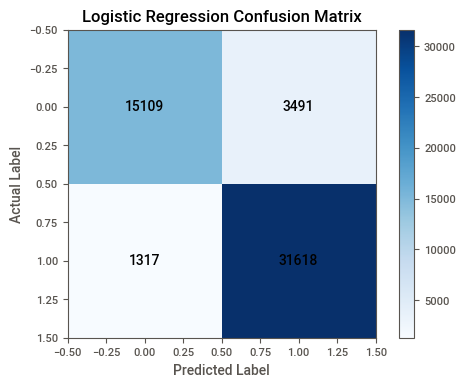


🔹 Training Random Forest Model...
✅ Random Forest Accuracy: 0.9770
⏳ Random Forest Training Time: 92.5989 s
⏳ Random Forest Prediction Time: 1.6642 s

🔹 Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18600
           1       0.98      0.98      0.98     32935

    accuracy                           0.98     51535
   macro avg       0.97      0.98      0.98     51535
weighted avg       0.98      0.98      0.98     51535



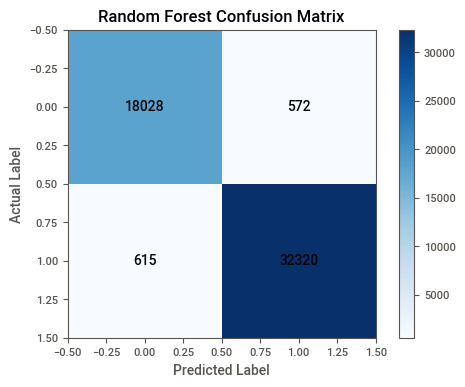


🔹 Training Isolation Forest Model...
✅ Isolation Forest Accuracy: 0.3580
⏳ Isolation Forest Training Time: 4.3923 s
⏳ Isolation Forest Prediction Time: 0.7390 s

🔹 Classification Report - Isolation Forest:
              precision    recall  f1-score   support

           0       0.34      0.86      0.49     18600
           1       0.49      0.08      0.13     32935

    accuracy                           0.36     51535
   macro avg       0.41      0.47      0.31     51535
weighted avg       0.43      0.36      0.26     51535



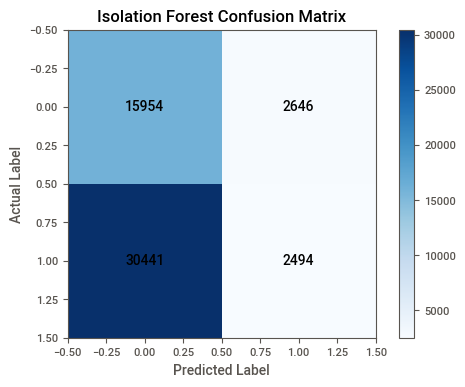


🔹 Training XGBoost Model...


C:\Users\yadav\miniconda3\envs\Zomato\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.9877
⏳ XGBoost Training Time: 4.8342 s
⏳ XGBoost Prediction Time: 0.2419 s

🔹 Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18600
           1       0.99      0.99      0.99     32935

    accuracy                           0.99     51535
   macro avg       0.99      0.99      0.99     51535
weighted avg       0.99      0.99      0.99     51535



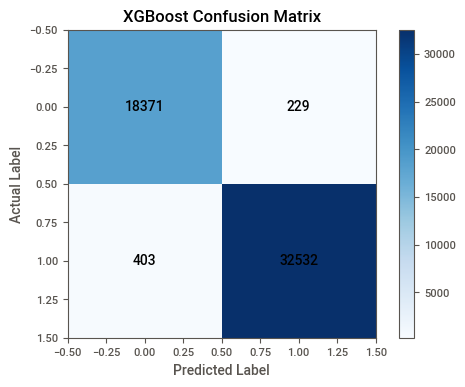


🔹 Training AdaBoost Model...


C:\Users\yadav\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ AdaBoost Accuracy: 0.9683
⏳ AdaBoost Training Time: 163.3990 s
⏳ AdaBoost Prediction Time: 4.5761 s

🔹 Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     18600
           1       0.98      0.97      0.98     32935

    accuracy                           0.97     51535
   macro avg       0.97      0.97      0.97     51535
weighted avg       0.97      0.97      0.97     51535



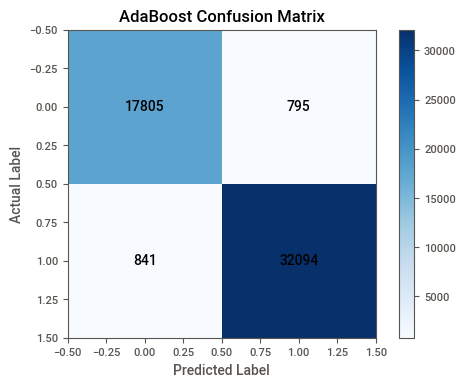


🔹 Cross-validation check for Random Forest
CV Scores: [0.85417677 0.92659358 0.86801203 0.97263942 0.75243529]
Mean CV Score: 0.8747714177731949


In [ ]:
    else:
        evaluate_model(name, model, X_train, y_train, X_test, y_test, is_outlier=is_outlier)

print("\n🔹 Cross-validation check for Random Forest")
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())